# Discover Sydney Criminal activies

## Introduction

in order analyse census data of crimes that had been captured around Sydney's nearest suburbs during 2013-2016. My aim is to idetify types of venues found near the crime scene, use the location data combined with statistics and machine learning techniques, try to discover hidden patterns in the data, and produce a conclusion based on my finding. I am hoping to produce the end result that people find useful to locate safe places around Sydney.

## Data

1. API - Foursquare location data
Publisher: Foursquare 
Link: https://developer.foursquare.com/
2. CSV - "Selected outdoor crimes in Sydney LGA"
Publisher: data.NSW brings together a list of NSW Government datasets available in one searchable website. 
Description: The data file contains incidents reported between January 2013 and March 2016 where the incident occurred at an outdoor or public place (including parks, streets, footpaths) within the Sydney Local Government Area.
Link: https://data.nsw.gov.au/data/dataset/non-domestic-assaults-sydney-lga/resource/8fa12ba1-bfba-42d5-bfc7-037604b75b7c
3. API - "NSW Suburb/Locality Boundaries "
Publisher: Department of Industry, Innovation and Science 
Description: The digital Suburb/Locality Boundaries and their legal identifiers have been derived from the cadastre data from each Australian state and territory jurisdiction and are available below
Link: https://data.gov.au/dataset/nsw-suburb-locality-boundaries-psma-administrative-boundaries

## Methodology

K-Means Clustering - To segment and cluster neighborhoods in Sydney's local government areas.
<br/>
Pearson Correlation - To assesss correlation between venues and criminal activteis.
<br/>
Choropleth Map - To visualize distribution of crimes across Sydney local suburbs
<br/>
Line, Pie, Scattered Graph - To visualize k-mean efficiency, criminal volume by suburbs, and pearson correlation.
<br/>
Heat Map - To visualize the best correlation (venue types vs criminal volume).
<br/>
Word Cloud - To identify frequent venues types found near crime scene.

## Table of Contents

1. Download and Explore Dataset
2. Explore Neighborhoods in Sydney local suburbs
3. Analyze Each Neighborhood
4. Cluster Neighborhoods
5. Examine Clusters
6. Correlation and Causation (Pearson Correlation)
7. Discussion and Conclusion 

### Download and Explore Dataset

In [2]:
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import pandas as pd # library for data analsysis
import os
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geographiclib: 1.49-py_0   conda-forge
    geopy:         1.17.0-py_0 conda-forge

geographiclib- 100% |################################| Time: 0:00:00   1.03 MB/s
geopy-1.17.0-p 100% |################################| Time: 0:00:00   1.59 MB/s
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00   2.87 MB/s
branca-0.3.1-p 100% |################################| Time: 0:00:00  26.41 MB/s
vincent-0.4.4- 100% |###################

In [3]:
# The code was removed by Watson Studio for sharing.

,FID,OBJECTID,bcsrgrp,bcsrcat,lganame,locsurb,locprmc1,locpcode,bcsrgclat,bcsrgclng,bcsrgccde,incyear,incmonth,incday,incsttm,eventyr,eventmth,poisex,poi_age,uniqueID
0,0,1,Assault,Non-domestic violence related assault,Sydney,REDFERN,OUTDOOR/PUBLIC PLACE,2016,-33.892390,151.214790,Intersect,2012,August,Monday,16:00,2013,February,,0.000000,50658277
1,1,2,Assault,Non-domestic violence related assault,Sydney,SYDNEY,OUTDOOR/PUBLIC PLACE,2000,-33.867700,151.209840,Intersect,2012,October,Tuesday,18:00,2013,February,,0.000000,53061821
2,2,3,Assault,Non-domestic violence related assault,Sydney,WOOLLOOMOOLOO,OUTDOOR/PUBLIC PLACE,2011,-33.872671,151.219100,Address,2013,January,Tuesday,1:30,2013,January,,0.000000,50001248
3,3,5,Assault,Non-domestic violence related assault,Sydney,WOOLLOOMOOLOO,OUTDOOR/PUBLIC PLACE,2011,-33.870260,151.220190,Intersect,2013,January,Tuesday,3:00,2013,January,,0.000000,49962948
4,4,6,Assault,Non-domestic violence related assault,Sydney,SURRY HILLS,OUTDOOR/PUBLIC PLACE,2010,-33.880070,151.215001,Intersect,2013,January,Tuesday,12:51,2013,January,M,50.331964,49970181


In [4]:
df_crime_data_bysub=df_data_1.groupby('locsurb').agg(['mean', 'count'])
df_crime_data_bysub.head()

FID            OBJECTID          locpcode        \
                      mean count          mean count        mean count   
locsurb                                                                  
ALEXANDRIA    13017.431461   445  13934.355056   445  2015.00000   445   
ANNANDALE     13039.461538    26  14206.961538    26  2038.00000    26   
BARANGAROO    12988.333333     6  14201.833333     6  2000.00000     6   
BEACONSFIELD  13187.472222    36  13583.527778    36  2015.00000    36   
CAMPERDOWN    11668.155015   329  12710.398176   329  2032.74772   329   

              bcsrgclat         bcsrgclng            incyear        \
                   mean count        mean count         mean count   
locsurb                                                              
ALEXANDRIA   -33.903926   445  151.195036   445  2013.988764   445   
ANNANDALE    -33.874126    26  151.175681    26  2014.230769    26   
BARANGAROO   -33.858751     6  151.202238     6  2014.000000     6   
BEACONSFIELD -33.911100    36  151.200520    36  2013.972222    36   
CAMPERDOWN   -33.886443   329  151.183062   329  2014.224924   329   

                  eventyr          poi_age            uniqueID        
                     mean count       mean count          mean count  
locsurb                                                               
ALEXANDRIA    2014.004494   445   7.950657   445  5.750224e+07   445  
ANNANDALE     2014.230769    26  15.578871    26  5.587292e+07    26  
BARANGAROO    2014.166667     6   0.000000     6  5.722528e+07     6  
BEACONSFIELD  2013.972222    36   1.950414    36  5.628028e+07    36  
CAMPERDOWN    2014.224924   329  17.054285   329  5.770592e+07   329

In [5]:
# download countries geojson file
!wget --quiet "https://data.gov.au/geoserver/nsw-suburb-locality-boundaries-psma-administrative-boundaries/wfs?request=GetFeature&typeName=ckan_91e70237_d9d1_4719_a82f_e71b811154c6&outputFormat=json" -O nsw.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [6]:
df_crime_data_bysub2=df_data_1.copy()
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_crime_data_bysub2.drop(['FID','bcsrgclng','bcsrgrp','bcsrcat','lganame','locprmc1','locpcode','bcsrgclat','bcsrgccde','incyear','incmonth','incday','incsttm','eventyr','eventmth','poisex','poi_age','uniqueID'], axis=1, inplace=True)
df_crime_data_bysub2=df_crime_data_bysub2.groupby('locsurb').count()
df_crime_data_bysub2 = df_crime_data_bysub2.reset_index(drop=False)
df_crime_data_bysub2.rename(columns={'OBJECTID':'Count', 'locsurb':'Suburb'}, inplace=True)

#df_crime_data_bysub2['Count'] = df_crime_data_bysub2.count(axis=1)
df_crime_data_bysub2.head()

,Suburb,Count
0,ALEXANDRIA,445
1,ANNANDALE,26
2,BARANGAROO,6
3,BEACONSFIELD,36
4,CAMPERDOWN,329


In [7]:
import json
from pprint import pprint

data = json.load(open('nsw.json'))

data['features'][0]['properties']['nsw_loca_2']
!echo "" > sydney_geojson.json

with open('sydney_geojson.json', 'a') as outfile:
    outfile.write("{\"type\":\"FeatureCollection\",\"crs\":{\"type\":\"name\",\"properties\":{\"name\":\"urn:ogc:def:crs:OGC:1.3:CRS84\"}},\"features\":[")
    for i in range(len(data['features'])):
        if (data['features'][i]['properties']['nsw_loca_2'] in df_crime_data_bysub2['Suburb'].values):
            #print(str(i) + " - " + data['features'][i]['properties']['nsw_loca_2'])
            #data['features'].pop(i)
            json.dump(data['features'][i], outfile)
            outfile.write(",")
    outfile.seek(0,2) #end of file
    size=outfile.tell()
    outfile.truncate(size-1)#remove the "," at tail end
    outfile.write("],\"crs\":{\"type\":\"name\",\"properties\":{\"name\":\"urn:ogc:def:crs:EPSG::4283\"}}}")

In [8]:
address = 'Sydney'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Sydney are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Sydney are -33.8548157, 151.2164539.


In [9]:
#australia_geo=get_file('aus_lga.geojson') # geojson file
#australia_geo=load_string(au_geojson) # geojson file
australia_geo = r'sydney_geojson.json'

# create a plain world map
sydney_map = folium.Map(location=[latitude-0.04, longitude], zoom_start=13)

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
sydney_map.choropleth(
    geo_data=australia_geo,
    data=df_crime_data_bysub2,
    columns=['Suburb', 'Count'],
    key_on='feature.properties.nsw_loca_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crimes density in Sydney',
    reset=True
)

# display map
sydney_map
#df_can.columns

In [10]:
df_crime_data_bysub2.sort_values('Count',ascending=False)

,Suburb,Count
27,SYDNEY,4015
20,POTTS POINT,3262
26,SURRY HILLS,3168
7,DARLINGHURST,2090
31,WOOLLOOMOOLOO,1589
22,REDFERN,1554
15,HAYMARKET,1171
30,WATERLOO,860
14,GLEBE,787
17,MOORE PARK,563


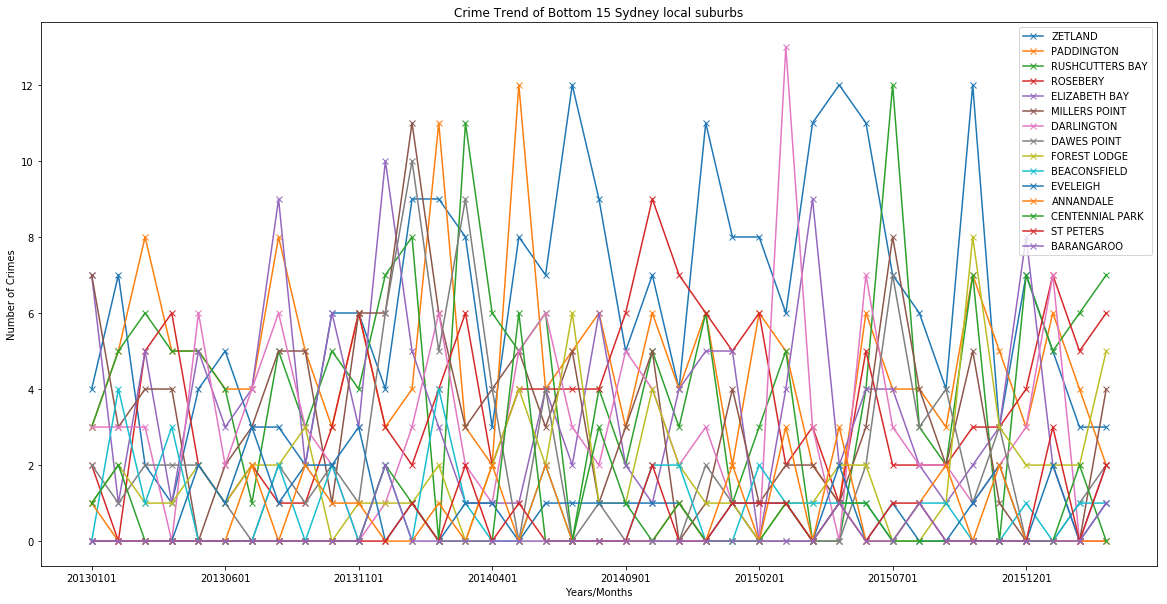

In [12]:
df_can=df_data_1[['locsurb','incyear','incmonth']]
topX=df_crime_data_bysub2.sort_values('Count',ascending=False)['Suburb'].tail(15).values
df_can=df_can[df_can['locsurb'].isin(topX)]
#df_can=df_can[df_can['locsurb']=='SYDNEY']

df_can=pd.get_dummies(df_can[['locsurb']], prefix="", prefix_sep="")

# add Year/Month column back to dataframe
df_can['Year'] = df_data_1['incyear'] 
df_can['Month'] = df_data_1['incmonth'] 

df_can=df_can.groupby(['Year','Month'],as_index=False).sum()

df_can["Period"] = df_can["Year"].map(str) + "-" + df_can["Month"].map(str)
df_can['Period'] = pd.to_datetime(df_can['Period']).astype(str).str.replace("-","").astype(int)

df_can=df_can.sort_values('Period')

#Include data 2013-2016 in plot
df_can=df_can[df_can['Year'].isin([2013,2014,2015,2016])]

# move Period column to the first column
#fixed_columns = [df_can.columns[-1]] + list(df_can.columns[:-1])
df_can.drop(['Year','Month'], axis=1, inplace=True)
fixed_columns = [df_can.columns[-1]] + list(topX)
df_can = df_can[fixed_columns]

df_topX=df_can.set_index('Period')

df_topX.index = df_topX.index.map(str) # let's change the index values of df_top5 to type integer for plotting
df_topX.plot(kind='line', 
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             Marker='x'
             )

plt.title('Crime Trend of Bottom 15 Sydney local suburbs')
plt.ylabel('Number of Crimes')
plt.xlabel('Years/Months')
# lines is a list of plt.Line2D instances

df_topX
plt.show()

### 2. Explore Neighborhoods in Sydney local suburbs

In [14]:
CLIENT_ID = '5AH0GPUMTUXR11GMFRREH14DYCSRJXBAZQA333NXKKIA10FY' # your Foursquare ID
CLIENT_SECRET = '40N3R20P0ZYBKTFQJBPJENP2K2RCE1EZVPMKAOLJDLEF2UFC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5AH0GPUMTUXR11GMFRREH14DYCSRJXBAZQA333NXKKIA10FY
CLIENT_SECRET:40N3R20P0ZYBKTFQJBPJENP2K2RCE1EZVPMKAOLJDLEF2UFC


In [15]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 100 # define radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:
            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except Exception:
            pass  # or you could use 'continue'
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    print('Transaction Finished')
    return(nearby_venues)

In [16]:
df_crime_data_bysub2.sort_values('Count',ascending=False).tail(15)

,Suburb,Count
32,ZETLAND,246
19,PADDINGTON,186
24,RUSHCUTTERS BAY,172
23,ROSEBERY,147
10,ELIZABETH BAY,139
16,MILLERS POINT,132
8,DARLINGTON,120
9,DAWES POINT,81
13,FOREST LODGE,73
3,BEACONSFIELD,36


In [17]:

limit = ['ZETLAND','PADDINGTON','RUSHCUTTERS BAY','ROSEBERY','ELIZABETH BAY','MILLERS POINT','DARLINGTON','DAWES POINT','FOREST LODGE','BEACONSFIELD','EVELEIGH','ANNANDALE','CENTENNIAL PARK','ST PETERS','BARANGAROO']
df_tsubs=df_data_1[df_data_1['locsurb'].isin(limit)]

syd_lga_venues = getNearbyVenues(names=df_tsubs['locsurb'],
                                   latitudes=df_tsubs['bcsrgclat'],
                                   longitudes=df_tsubs['bcsrgclng']
                                  )

ANNANDALE
ELIZABETH BAY
DARLINGTON
DAWES POINT
PADDINGTON
ZETLAND
PADDINGTON
PADDINGTON
PADDINGTON
DAWES POINT
MILLERS POINT
ELIZABETH BAY
ELIZABETH BAY
ROSEBERY
ZETLAND
ZETLAND
ZETLAND
PADDINGTON
DARLINGTON
PADDINGTON
ROSEBERY
DARLINGTON
PADDINGTON
PADDINGTON
EVELEIGH
DARLINGTON
ROSEBERY
ZETLAND
DARLINGTON
MILLERS POINT
EVELEIGH
DARLINGTON
DARLINGTON
ELIZABETH BAY
DARLINGTON
ROSEBERY
MILLERS POINT
PADDINGTON
DARLINGTON
ANNANDALE
ANNANDALE
PADDINGTON
MILLERS POINT
PADDINGTON
ELIZABETH BAY
ELIZABETH BAY
ROSEBERY
PADDINGTON
ELIZABETH BAY
MILLERS POINT
DARLINGTON
ELIZABETH BAY
BARANGAROO
ZETLAND
RUSHCUTTERS BAY
ELIZABETH BAY
ELIZABETH BAY
PADDINGTON
EVELEIGH
DARLINGTON
MILLERS POINT
MILLERS POINT
DARLINGTON
DARLINGTON
MILLERS POINT
PADDINGTON
ZETLAND
ROSEBERY
DAWES POINT
PADDINGTON
PADDINGTON
ZETLAND
MILLERS POINT
DARLINGTON
PADDINGTON
DARLINGTON
ZETLAND
ROSEBERY
RUSHCUTTERS BAY
RUSHCUTTERS BAY
FOREST LODGE
DARLINGTON
ELIZABETH BAY
ZETLAND
PADDINGTON
PADDINGTON
DARLINGTON
RUSHCUTTERS BAY


In [18]:
syd_lga_venues.to_csv('syd_lga_venues.csv')

### 3. Analyze Each Neighborhood

In [19]:
# one hot encoding
syd_lga_onehot = pd.get_dummies(syd_lga_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
syd_lga_onehot['Neighborhood'] = syd_lga_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [syd_lga_onehot.columns[-1]] + list(syd_lga_onehot.columns[:-1])
syd_lga_onehot = syd_lga_onehot[fixed_columns]

syd_lga_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health Food Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Office,Outdoor Supply Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Road,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,ANNANDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ANNANDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ANNANDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ANNANDALE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [20]:
syd_lga_venues[['Neighborhood','Venue','Venue Category']].groupby('Neighborhood',as_index= False)
#syd_lga__grouped=syd_lga_onehot.groupby('Neighborhood').mean().reset_index()
syd_lga__grouped=syd_lga_onehot.groupby('Neighborhood').sum().reset_index()
syd_lga__grouped

,Neighborhood,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Burger Joint,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Clothing Store,Cocktail Bar,Coffee Shop,College Rec Center,Comedy Club,Comfort Food Restaurant,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cuban Restaurant,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Event Space,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Health Food Store,History Museum,Home Service,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Korean Restaurant,Lebanese Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Malay Restaurant,Market,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Modern Greek Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Office,Outdoor Supply Store,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pie Shop,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Rental Car Location,Restaurant,Road,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Souvlaki Shop,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sri Lankan Restaurant,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tourist Information Center,Toy / Game Store,Track,Trail,Train Station,Tunnel,Turkish Restaurant,Used Bookstore,Vegetarian / Vegan Restaurant,Veterinarian,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,ANNANDALE,0.0,17.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,26.0,26.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,109.0,0.0,17.0,0.0,17.0,26.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,9.0,0.0,15.0,0.0,0.0,0.0,17.0,0.0,18.0,0.0,0.0,0.0,17.0,33.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0
1,BARANGAROO,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,41.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,6.0,0.0,0.0,0.0,2.0,7.0,2.0,1.0,0.0,0.0,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [21]:
num_top_venues = 5
temp=pd.DataFrame()
for hood in syd_lga__grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = syd_lga__grouped[syd_lga__grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ANNANDALE----
                venue   freq
0                Park  109.0
1                Café   82.0
2         Supermarket   33.0
3  Light Rail Station   30.0
4         Pizza Place   26.0


----BARANGAROO----
                venue  freq
0                Café  41.0
1                Park  16.0
2                 Pub   9.0
3  Italian Restaurant   8.0
4                 Bar   8.0


----BEACONSFIELD----
                venue   freq
0                Café  196.0
1         Coffee Shop   59.0
2                Park   52.0
3     Thai Restaurant   49.0
4  Italian Restaurant   48.0


----CENTENNIAL PARK----
           venue  freq
0           Café  51.0
1           Park  28.0
2            Bar  23.0
3  Movie Theater  22.0
4         Circus  18.0


----DARLINGTON----
             venue    freq
0             Café  1150.0
1              Bar   329.0
2  Thai Restaurant   279.0
3              Pub   277.0
4             Park   216.0


----DAWES POINT----
                   venue   freq
0                   C

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [23]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = syd_lga__grouped['Neighborhood']

for ind in np.arange(syd_lga__grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(syd_lga__grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANNANDALE,Park,Café,Supermarket,Light Rail Station,Japanese Restaurant,Pizza Place,Italian Restaurant,Thai Restaurant,Sporting Goods Shop,Food Court
1,BARANGAROO,Café,Park,Pub,Supermarket,Italian Restaurant,Coffee Shop,Bar,Hotel,Sporting Goods Shop,Seafood Restaurant
2,BEACONSFIELD,Café,Coffee Shop,Park,Thai Restaurant,Italian Restaurant,Furniture / Home Store,Pizza Place,Electronics Store,Supermarket,Sporting Goods Shop
3,CENTENNIAL PARK,Café,Park,Bar,Movie Theater,Circus,Food Truck,Sandwich Place,Cricket Ground,Sporting Goods Shop,Supermarket
4,DARLINGTON,Café,Bar,Thai Restaurant,Pub,Park,Italian Restaurant,Japanese Restaurant,Supermarket,Pizza Place,Coffee Shop
5,DAWES POINT,Café,Pub,Australian Restaurant,Hotel,Bar,Park,Boat or Ferry,Italian Restaurant,Scenic Lookout,Japanese Restaurant
6,ELIZABETH BAY,Café,Italian Restaurant,Park,Japanese Restaurant,Bar,Thai Restaurant,Australian Restaurant,Wine Bar,Hotel,Pizza Place
7,EVELEIGH,Café,Thai Restaurant,Pub,Park,Italian Restaurant,Bar,Supermarket,Coffee Shop,Bakery,Sporting Goods Shop
8,FOREST LODGE,Café,Park,Thai Restaurant,Pub,Sporting Goods Shop,Supermarket,Japanese Restaurant,Pizza Place,Playground,Italian Restaurant
9,MILLERS POINT,Café,Pub,Hotel,Bar,Park,Italian Restaurant,Coffee Shop,Australian Restaurant,Seafood Restaurant,Harbor / Marina


### 4. Cluster Neighborhoods

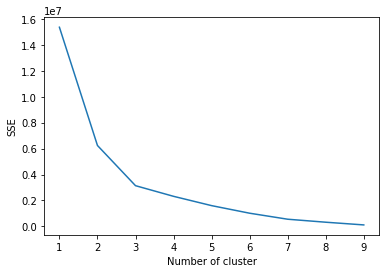

In [24]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sydney_grouped_clustering = syd_lga__grouped.drop('Neighborhood', 1)

sse = {}
for k in range(1, 10):
    #kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sydney_grouped_clustering)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [25]:
# set number of clusters
kclusters = 3

#sydney_grouped_clustering = syd_lga__grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sydney_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 2, 1, 1, 0, 2, 2, 1], dtype=int32)

In [26]:
kmeans.labels_[:]

array([2, 2, 2, 2, 1, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1], dtype=int32)

In [28]:
df_crime_data_bysub3=df_data_1.copy()
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_crime_data_bysub3.drop(['FID','bcsrgrp','OBJECTID','bcsrcat','lganame','locprmc1','locpcode','bcsrgccde','incyear','incmonth','incday','incsttm','eventyr','eventmth','poisex','poi_age','uniqueID'], axis=1, inplace=True)
df_crime_data_bysub3=df_crime_data_bysub3.groupby('locsurb').mean()
df_crime_data_bysub3 = df_crime_data_bysub3.reset_index(drop=False)
df_crime_data_bysub3.rename(columns={'locsurb':'Suburb','bcsrgclat':'Latitude','bcsrgclng':'Longitude'}, inplace=True)
df_crime_data_bysub3.head()

,Suburb,Latitude,Longitude
0,ALEXANDRIA,-33.903926,151.195036
1,ANNANDALE,-33.874126,151.175681
2,BARANGAROO,-33.858751,151.202238
3,BEACONSFIELD,-33.911100,151.200520
4,CAMPERDOWN,-33.886443,151.183062


In [29]:
sydney_merged = df_crime_data_bysub3[df_crime_data_bysub2['Suburb'].isin(limit)]

# add clustering labels
sydney_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sydney_merged = sydney_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Suburb')

sydney_merged.head() # check the last columns!

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Suburb,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,ANNANDALE,-33.874126,151.175681,2,Park,Café,Supermarket,Light Rail Station,Japanese Restaurant,Pizza Place,Italian Restaurant,Thai Restaurant,Sporting Goods Shop,Food Court
2,BARANGAROO,-33.858751,151.202238,2,Café,Park,Pub,Supermarket,Italian Restaurant,Coffee Shop,Bar,Hotel,Sporting Goods Shop,Seafood Restaurant
3,BEACONSFIELD,-33.911100,151.200520,2,Café,Coffee Shop,Park,Thai Restaurant,Italian Restaurant,Furniture / Home Store,Pizza Place,Electronics Store,Supermarket,Sporting Goods Shop
5,CENTENNIAL PARK,-33.894095,151.228133,2,Café,Park,Bar,Movie Theater,Circus,Food Truck,Sandwich Place,Cricket Ground,Sporting Goods Shop,Supermarket
8,DARLINGTON,-33.890102,151.194512,1,Café,Bar,Thai Restaurant,Pub,Park,Italian Restaurant,Japanese Restaurant,Supermarket,Pizza Place,Coffee Shop


In [30]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sydney_merged['Latitude'], sydney_merged['Longitude'], sydney_merged['Suburb'], sydney_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 5. Examine Clusters

In [32]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py35_0 conda-forge

wordcloud-1.4. 100% |################################| Time: 0:00:00   2.80 MB/s
Wordcloud is installed and imported!


In [33]:
stopwords = set(STOPWORDS)

In [34]:
# instantiate a word cloud object
eval_wc = WordCloud(
    background_color='white',
    max_words=10,
    stopwords=stopwords
)

# generate the word cloud
eval_wc.generate("helo")

#### Cluster 1 - "Italian Thai foodie paradise" (GREEN)

10      ELIZABETH BAY
24    RUSHCUTTERS BAY
Name: Suburb, dtype: object


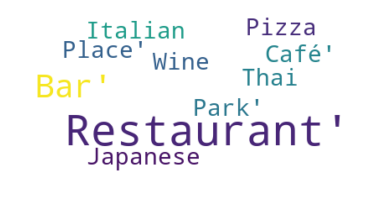

In [35]:
#Extat column 0 (->Suburb) and 5-10 (->common venues)
temp0=sydney_merged.loc[sydney_merged['Cluster Labels'] == 0, sydney_merged.columns[[0] + list(range(5, sydney_merged.shape[1]))]]
print(temp0['Suburb'])
entry=sydney_merged[sydney_merged['Cluster Labels']==0].iloc[:, list(range(4, sydney_merged.shape[1]))]
words=np.array2string(entry.values)
eval_wc.generate(words)
# display the word cloud
plt.imshow(eval_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Cluster 2 - "Japanese Thai Italian foodie paradise" (PURPLE)

8        DARLINGTON
9       DAWES POINT
16    MILLERS POINT
19       PADDINGTON
32          ZETLAND
Name: Suburb, dtype: object


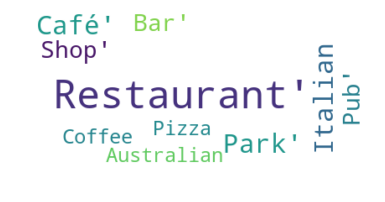

In [36]:
temp1=sydney_merged.loc[sydney_merged['Cluster Labels'] == 1, sydney_merged.columns[[0] + list(range(5, sydney_merged.shape[1]))]]
print(temp1['Suburb'])
entry=sydney_merged[sydney_merged['Cluster Labels']==1].iloc[:, list(range(4, sydney_merged.shape[1]))]
words=np.array2string(entry.values)
eval_wc.generate(words)
# display the word cloud
plt.imshow(eval_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Cluster 3 - "Australia Italian foodie paradise" (RED)

1           ANNANDALE
2          BARANGAROO
3        BEACONSFIELD
5     CENTENNIAL PARK
12           EVELEIGH
13       FOREST LODGE
23           ROSEBERY
25          ST PETERS
Name: Suburb, dtype: object


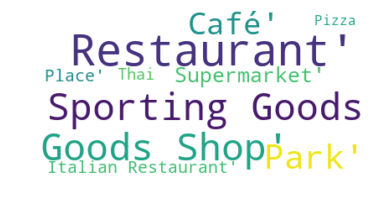

In [37]:
temp2=sydney_merged.loc[sydney_merged['Cluster Labels'] == 2, sydney_merged.columns[[0] + list(range(5, sydney_merged.shape[1]))]]
print(temp2['Suburb'])
entry=sydney_merged[sydney_merged['Cluster Labels']==2].iloc[:, list(range(4, sydney_merged.shape[1]))]
words=np.array2string(entry.values)
eval_wc.generate(words)
# display the word cloud
plt.imshow(eval_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 6. Correlation and Causation (Pearson Correlation)

In [38]:
check_cc_c=syd_lga_onehot.groupby('Neighborhood').count()
#check_cc_c['count'] = syd_lga_onehot.groupby('Neighborhood')['Trail'].transform('count')
check_cc_s=syd_lga__grouped=syd_lga_onehot.groupby('Neighborhood').sum()
#check_cc_s['Count']=syd_lga_onehot.groupby(['Neighborhood']).size()
check_cc_s=check_cc_s.reset_index()
#syd_lga_onehot.head()

check_cc_s=pd.merge(check_cc_s, df_crime_data_bysub2, left_on='Neighborhood', right_on='Suburb', how='left').drop('Suburb', axis=1)

In [39]:
df_cluster0=check_cc_s[check_cc_s['Neighborhood'].isin(temp0['Suburb'])]
#df_cluster=check_cc_s
c0_corr=df_cluster0.corr().fillna(0) #fill missing values with 0
    #df_cluster0.corr().dropna(how='all')
#check_cc_s.corr().head()
c0_corr.head()

c=c0_corr.corr().abs()
s=c.unstack()
so=s.sort_values(kind="quicksort")
so['Count']

pearson_coef, p_value = stats.pearsonr(c0_corr['Pizza Place'], c0_corr['Count'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 1.0  with a P-value of P = 0.0


In [40]:
#df_cluster1=check_cc_s[check_cc_s['Neighborhood'].isin(temp1['Suburb'])]

df_cluster=check_cc_s
c=df_cluster.corr()
s=c.unstack()
so=s.sort_values(kind="quicksort")
so['Count']

count=0
lst = []
for i in so['Count']:
    mytype=so['Count'].index[count]
    pearson_coef, p_value = stats.pearsonr(df_cluster[mytype], df_cluster['Count'])
    #print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 
    lst.append([mytype, pearson_coef, p_value,pearson_coef/p_value])
    count=count+1
tempdf = pd.DataFrame(lst, columns=['Venue', 'Pearson', 'Pvalue','cal'])  
tempdf.set_index('Venue',inplace=True)
tempdf.sort_values(by=['cal'],ascending=False).replace([np.inf, -np.inf], np.nan).dropna()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: divide by zero encountered in double_scalars


,Pearson,Pvalue,cal
Venue,,,
Sandwich Place,0.909332,0.000003,344768.829440
Park,0.887623,0.000010,88000.702415
Sporting Goods Shop,0.882053,0.000014,64750.302304
Asian Restaurant,0.877327,0.000017,50482.240915
Playground,0.873482,0.000021,41523.237264
Supermarket,0.859980,0.000039,21879.272510
Gastropub,0.858908,0.000041,20851.514863
Train Station,0.854581,0.000050,17235.604326
Shopping Mall,0.809411,0.000256,3157.242544


(0, 324.98627882782887)

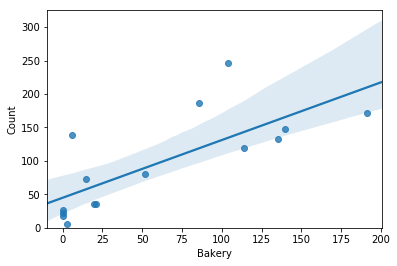

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Bakery location as potential predictor variable of crime count
sns.regplot(x="Bakery", y="Count", data=check_cc_s)
plt.ylim(0,)

(0, 305.38520691387112)

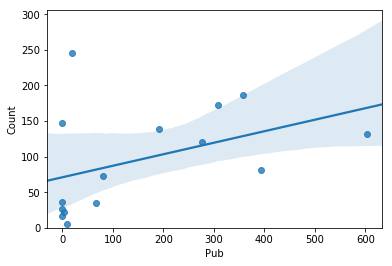

In [42]:
# Pub locations as potential predictor variable of crime count
sns.regplot(x="Pub", y="Count", data=check_cc_s)
plt.ylim(0,)

(0, 442.58292307733791)

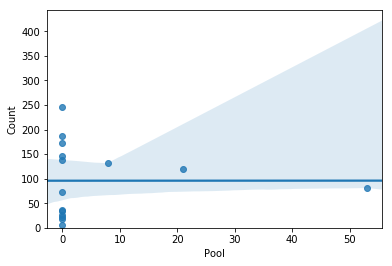

In [43]:
# Pool locations as potential predictor variable of crime count
sns.regplot(x="Pool", y="Count", data=check_cc_s)
plt.ylim(0,)

In [44]:
grouped_test1=tempdf.reset_index().replace([np.inf, -np.inf], np.nan).dropna()
grouped_test1=grouped_test1[['Venue','Pearson','Pvalue']].round(3)
grouped_test1=grouped_test1.sort_values(by=['Pearson'],ascending=False).head(20)
grouped_test1=grouped_test1.pivot(index='Venue',columns='Pvalue')
grouped_test1=grouped_test1.fillna(0)

#grouped_test1=grouped_test1[['Venue','cal']]
grouped_test1=grouped_test1.groupby(['Venue'],as_index= True).mean()

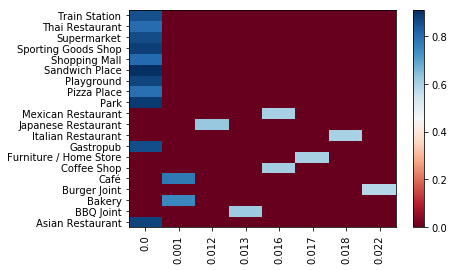

In [45]:
fig, ax=plt.subplots()
im=ax.pcolor(grouped_test1, cmap='RdBu')

#label names
row_labels=grouped_test1.columns.levels[1]
col_labels=grouped_test1.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_test1.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(grouped_test1.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

Top 3 venues correlated to Sydneys's crime activities are:
<br/>
1- Asian Restaurant
<br/>
2- Gastropub
<br/>
3- Park

### 7. Discussion and Conclusion

This attempt helps to get some ideas around the nature of venues foun around crime scenes. There are a lots of areas in this study where additional researches and reviews are required.